<a href="https://colab.research.google.com/github/SaurabhSRP/Stock-Price-Prediction-Projects/blob/main/Netflix_stock_price_prediction_using_FBprophet_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from prophet import Prophet ###there is a difference in prophet and Prophet while importing
import pandas as pd
import yfinance as yf
import datetime 
from datetime import date, timedelta

In [ ]:
today=date.today()
print(today)

2022-09-22


In [ ]:
end_date=today.strftime("%Y-%m-%d")
start_date=date.today()-timedelta(days=365)

In [ ]:
data=yf.download('NFLX',start=start_date,end=end_date,progress=False)

In [ ]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-09-22,579.690002,595.650024,579.690002,590.650024,590.650024,4021800
2021-09-23,590.789978,599.320007,589.130005,593.260010,593.260010,2526200
2021-09-24,592.500000,592.979980,583.640015,592.390015,592.390015,2126200
2021-09-27,587.950012,593.580017,576.929993,592.640015,592.640015,2504700
2021-09-28,589.000000,599.539978,580.159973,583.849976,583.849976,4431100
...,...,...,...,...,...,...
2022-09-15,230.470001,242.289993,229.100006,235.380005,235.380005,19454100
2022-09-16,231.220001,241.360001,227.830002,240.130005,240.130005,18871600
2022-09-19,245.050003,245.250000,235.750000,243.630005,243.630005,17912400


In [ ]:
data["Date"]=data.index
data=data[["Date","Open","High","Low","Close", "Adj Close", "Volume"]]
data.reset_index(drop=True,inplace=True)
print(data.tail())

          Date        Open        High         Low       Close   Adj Close  \
247 2022-09-15  230.470001  242.289993  229.100006  235.380005  235.380005   
248 2022-09-16  231.220001  241.360001  227.830002  240.130005  240.130005   
249 2022-09-19  245.050003  245.250000  235.750000  243.630005  243.630005   
250 2022-09-20  240.369995  250.490005  239.660004  242.850006  242.850006   
251 2022-09-21  242.669998  248.300003  236.679993  236.869995  236.869995   

       Volume  
247  19454100  
248  18871600  
249  17912400  
250  16037400  
251   9148500  


In [ ]:
df=data[["Date","Close"]]
print(df.head())

        Date       Close
0 2021-09-22  590.650024
1 2021-09-23  593.260010
2 2021-09-24  592.390015
3 2021-09-27  592.640015
4 2021-09-28  583.849976


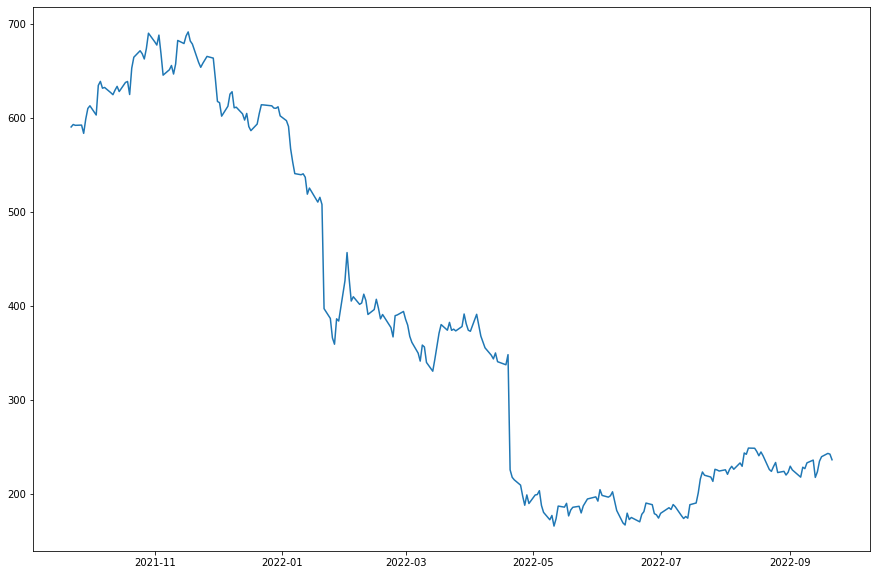

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.plot(df["Date"],df["Close"])

In [ ]:
df.rename(columns={"Date":"ds","Close":"y"},inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
fbp=Prophet()


fbp.fit(df)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxkl0ut0a/50cihl5u.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpxkl0ut0a/deaa05mi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20331', 'data', 'file=/tmp/tmpxkl0ut0a/50cihl5u.json', 'init=/tmp/tmpxkl0ut0a/deaa05mi.json', 'output', 'file=/tmp/tmpbv3fjl1q/prophet_model-20220922101939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
10:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
10:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
##Lets get future dates 
future_dates=fbp.make_future_dataframe(periods=10)
future_dates.tail()

,ds
257,2022-09-27
258,2022-09-28
259,2022-09-29
260,2022-09-30
261,2022-10-01


In [ ]:
##Lets forecast 
forecast=fbp.predict(future_dates)


            ds       trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0   2021-09-22  625.433709  592.175824  677.886526   625.433709   625.433709   
1   2021-09-23  625.798693  590.655114  676.566132   625.798693   625.798693   
2   2021-09-24  626.163677  588.642682  673.894050   626.163677   626.163677   
3   2021-09-27  627.258630  593.823379  680.132425   627.258630   627.258630   
4   2021-09-28  627.623615  592.737692  678.152779   627.623615   627.623615   
..         ...         ...         ...         ...          ...          ...   
257 2022-09-27  236.534464  202.271417  285.567796   236.245170   236.840175   
258 2022-09-28  237.087428  201.657625  290.157696   236.666085   237.610584   
259 2022-09-29  237.640392  203.913782  287.431277   237.059410   238.340245   
260 2022-09-30  238.193356  198.076304  285.275157   237.308907   239.126059   
261 2022-10-01  238.746320  178.242504  261.505022   237.625087   239.898006   

     additive_terms  additive_terms_low

In [ ]:
print(forecast[["ds","yhat","yhat_lower","yhat_upper"]].tail(10))

            ds        yhat  yhat_lower  yhat_upper
252 2022-09-22  241.211002  200.638202  287.149100
253 2022-09-23  238.443269  193.453171  280.210870
254 2022-09-24  216.321428  176.428985  258.172659
255 2022-09-25  216.874395  175.593518  261.145556
256 2022-09-26  245.535638  202.552891  288.143249
257 2022-09-27  245.555422  202.271417  285.567796
258 2022-09-28  244.058592  201.657625  290.157696
259 2022-09-29  245.081752  203.913782  287.431277
260 2022-09-30  242.314019  198.076304  285.275157
261 2022-10-01  220.192177  178.242504  261.505022


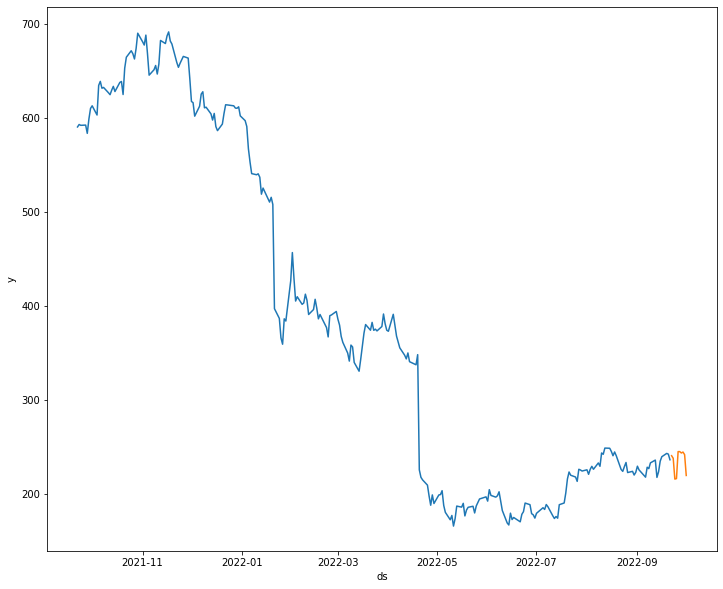

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,10))
sns.lineplot(x=df["ds"],y="y",data=df)
sns.lineplot(x=forecast["ds"],y=forecast["yhat"][252:262],data=forecast)

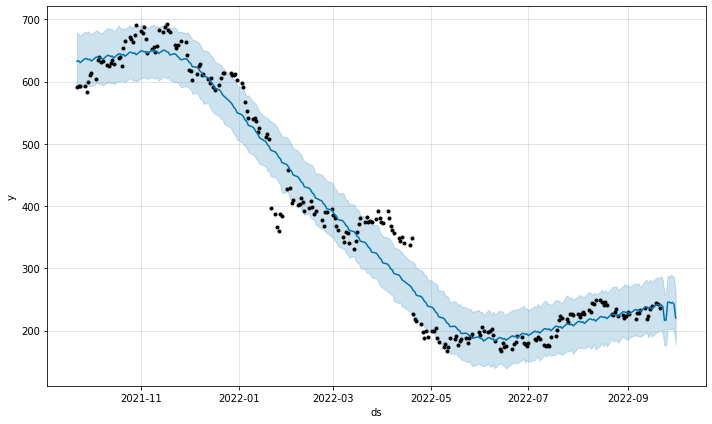

In [ ]:
figure=fbp.plot(forecast)

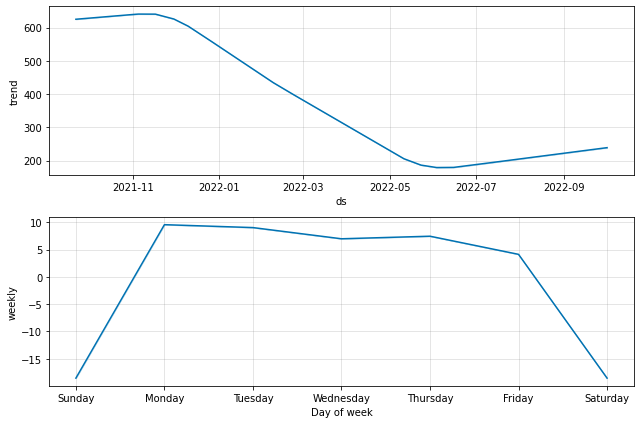

In [ ]:
####to see the forecast components 
fig=fbp.plot_components(forecast)

In [ ]:
from prophet.plot import plot_plotly,plot_components_plotly

plot_plotly(fbp,forecast)

In [ ]:
plot_components_plotly(fbp, forecast)
